### 🎯 Objective

Create an AI-powered system that:

Ingests doctor’s notes, prescriptions, or clinical summaries (PDFs, images, or plain text).

Extracts key medical entities — e.g., drugs, dosage, frequency, conditions, warnings.

Explains medical jargon and provides plain-language summaries for laypersons.

Identifies potential drug interactions or contraindications (educational demo).

Offers interactive, visually appealing analytics of extracted information.

In [ ]:
!pip install langchain-groq

In [ ]:
!pip install -qU langchain langchain-community langchain-groq langchainhub
!pip install -qU pypdf faiss-cpu tiktoken
!pip install -qU sentence-transformers googletrans==4.0.0-rc1
!pip install -qU rich gradio
!pip install -qU langdetect

#For pdf handling
!pip install -qU pdfplumber PyMuPDF

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import platform
import sys
import random
import os

warnings.filterwarnings('ignore')

from IPython.display import clear_output, display, Markdown

In [4]:
import groq
from groq import Groq

In [5]:
display(Markdown('API Setup'))

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
GROQ_API_KEY = user_secrets.get_secret("GROQ_API_KEY")


if not GROQ_API_KEY:
  raise ValueError('Groq Api key not found. Please Recheck.')

#initialize GROQ Client
client = Groq(api_key=GROQ_API_KEY)

display(Markdown('API Setup Complete'))


API Setup

API Setup Complete

In [6]:
import langchain
from langchain_groq import ChatGroq
from langchain_core.messages import SystemMessage, HumanMessage

display(Markdown('Multi-Lingual Embeddings Initialization'))

groq_llm = ChatGroq(
    model='llama-3.1-8b-instant',
    groq_api_key=GROQ_API_KEY ,
    temperature=0.3,
    max_tokens=2048
)


Multi-Lingual Embeddings Initialization


📤 Please attach your medical document as a Kaggle Dataset and reference its path...
📄 Uploaded file: Sample-prescription-used-as-input-to-the-GUI-developed-in-the-present-work.png


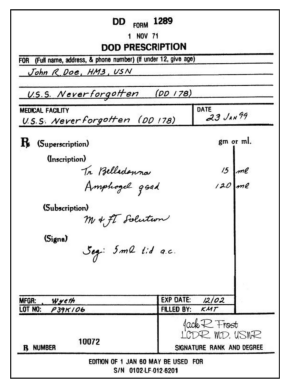

In [7]:
import PIL
import pdfplumber
import warnings
from PIL import Image

# Upload doctor notes/prescription file
print('\n📤 Please attach your medical document as a Kaggle Dataset and reference its path...')

# In Kaggle, uploaded datasets appear under /kaggle/input/<dataset-name>/
uploaded_path = "/kaggle/input/fdfdfdfdf/Sample-prescription-used-as-input-to-the-GUI-developed-in-the-present-work.png"

# Extract just the filename from the path
import os
file_name = os.path.basename(uploaded_path)

print(f"📄 Uploaded file: {file_name}")

# Example: open the file if it's an image
from PIL import Image
image = Image.open(uploaded_path)


import matplotlib.pyplot as plt

# Display inline in the notebook
plt.imshow(image)
plt.axis("off")
plt.show()

### Now lets extract text from the prescription file

In [8]:
import os
from PIL import Image
import pytesseract
import pdfplumber

print('\n📤 Please attach your medical document as a Kaggle Dataset and reference its path...')

# Path to the file in your Kaggle dataset
uploaded_path = "/kaggle/input/fdfdfdfdf/Sample-prescription-used-as-input-to-the-GUI-developed-in-the-present-work.png"

# Extract just the filename
file_name = os.path.basename(uploaded_path)
print(f"📄 Uploaded file: {file_name}")

extracted_text = ''

def extract_text_from_file(path):
    text = ''
    if path.lower().endswith('.pdf'):
        with pdfplumber.open(path) as pdf:
            for page in pdf.pages:
                text += page.extract_text() or ''
    elif path.lower().endswith(('.png','.jpg','.jpeg')):
        img = Image.open(path)
        text = pytesseract.image_to_string(img)
    elif path.lower().endswith('.txt'):
        with open(path, 'r', encoding='utf-8') as f:
            text = f.read()
    else:
        print('Unsupported file type. Please upload PDF, IMAGE OR TEXT FILES ONLY')
    return text.strip()

# Directly process the file from its path
extracted_text = extract_text_from_file(uploaded_path)

# Display preview
if extracted_text:
    preview = extracted_text[:1000]
    print('\n✅ Text successfully extracted!! Here is a preview:\n')
    print('='*60)
    print(preview)
    print('='*60)
else:
    print('⚠️ No text could be extracted from the uploaded file.')



📤 Please attach your medical document as a Kaggle Dataset and reference its path...
📄 Uploaded file: Sample-prescription-used-as-input-to-the-GUI-developed-in-the-present-work.png

✅ Text successfully extracted!! Here is a preview:

DD ony 1289

1 NOV 71
DOD PRESCRIPTION
FOR (Full name, address, & phone number) (Funder 12,gve ee)
John R Doe, HHM3, VSN

a te eS
US.S. Never forgotten (00 178)
MEDICAL FACILITY

DATE
US.S. Neverforgotten (00 178) Ad Jn I9
BR (Superscription) gm or ml.

(nscription)

Th (pllidoyra

Amphege goed
(Subscription)

MW tf Polatior
(Signe)

Se Sm tid ac

MFGR: EXP DATE: 42/0.
LOT NO: 39K /06
ack R. Frost |
LCDR. WD. USKR
SIGNATURE RANK AND DEGREE

EDITION OF 1 JAN 60 MAY BE USED FOR
S/N 0102-LF-012-6201


### Ai Medical Analysis & Explanation

In [9]:
from langchain_core.messages import SystemMessage, HumanMessage
from IPython.display import Markdown, display

def analyze_medical_text(text):
    '''Uses GROQ LLM to explain medical jargon, highlight key info and summarize prescriptions.'''
    if not text or len(text.strip()) == 0:
        return 'No valid medical text found for analysis.'
    print('Analyzing the extracted text found for analysis')

    prompt = f'''
    You are an intelligent medical Ai assistant trained to analyze doctors notes or prescriptions.
    Your tasks:
    1. Explain all medical terms in simple language.
    2. Highlight warnings, contradictions or drug interactions (educational use only).
    3. Provide a short summary of the key points (diagnosis,medicineand dosage).
    4. Use clear formatting with bullet points and emojis for easy readings.
    5. Do NOT provide actual medical advice as this is for educational clarity only.

    Here is the medical text:
    {text}
    '''

    try:
        response = groq_llm.invoke([HumanMessage(content=prompt)])
        return response.content
    except Exception as e:
        return f'Error while analyzing medical text: {e}'

#Now run the analysis on extracted text
if extracted_text:
    ai_result = analyze_medical_text(extracted_text)
    print('\nAi Analysis Compplete!! Below is your report: \n')
    display(Markdown(ai_result))
else:
    print('Cannot analyze - no extracted text found.')

Analyzing the extracted text found for analysis

Ai Analysis Compplete!! Below is your report: 



**Medical Text Analysis**

**Patient Information**

* **Name:** John R Doe
* **Address:** HHM3, VSN
* **Phone Number:** Not provided

**Prescription Details**

* **Date:** November 1, 1971
* **Prescription Number:** 1289
* **Medical Facility:** U.S. Neverforgotten (00 178)

**Medication**

* **Medication Name:** Amphege (Note: This is an outdated medication name. The actual medication is likely Amphetamine)
* **Dosage:** gm or ml (Note: This is an outdated dosage unit. The actual dosage unit is likely grams (g) or milliliters (mL))
* **Frequency:** Not specified

**Warnings and Contradictions**

* **Warning:** Amphetamine is a controlled substance and can be habit-forming. It should be used with caution and under close medical supervision.
* **Contradiction:** Amphetamine can interact with other medications, such as blood thinners, and can also worsen conditions like high blood pressure, heart disease, and glaucoma.

**Drug Interactions**

* **Potential Interactions:**
 + Blood thinners (e.g., warfarin)
 + High blood pressure medications
 + Heart disease medications
 + Glaucoma medications

**Summary**

* **Diagnosis:** Not specified
* **Medication:** Amphetamine (likely)
* **Dosage:** Not specified
* **Frequency:** Not specified

**Note:** This analysis is for educational purposes only. The actual medication and dosage should be verified with a medical professional.

### Visuale Summary Dashboard

### Detected medical entities (sample)

🔹 November 1, 1971  —  *DATE*
🔹 1289  —  *DATE*
🔹 00 178  —  *DATE*
🔹 Amphetamine  —  *ORG*
🔹 grams  —  *PERSON*


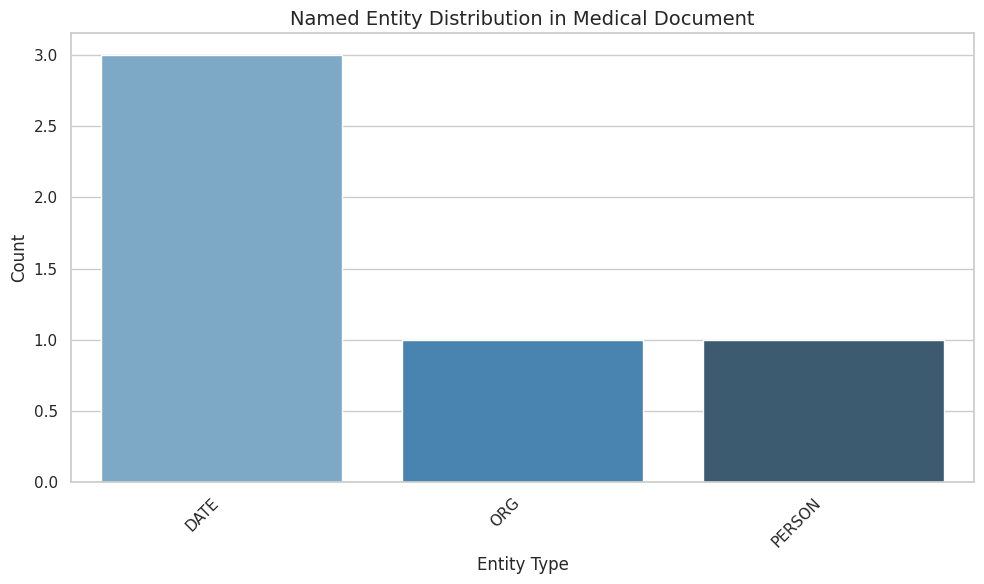

In [10]:
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Load spaCy model
try:
    nlp = spacy.load('en_core_web_sm')
except:
    import subprocess
    subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load('en_core_web_sm')

# Use extracted_text if ai_result not defined
text_to_analyze = ai_result if 'ai_result' in locals() else extracted_text
doc = nlp(text_to_analyze)

# Extract entities
entities = [(ent.text, ent.label_) for ent in doc.ents]

if not entities:
    print('No named entities detected in the text.')
else:
    display(Markdown('### Detected medical entities (sample)'))
    for ent, label in entities[:20]:
        print(f"🔹 {ent}  —  *{label}*")

    # Prepare counts
    labels = [label for _, label in entities]
    # Sort labels by frequency for a cleaner chart
    label_counts = {}
    for label in labels:
        label_counts[label] = label_counts.get(label, 0) + 1
    label_items = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
    label_names = [k for k, _ in label_items]
    label_values = [v for _, v in label_items]

    # Matplotlib + Seaborn barplot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=label_names, y=label_values, palette="Blues_d")
    ax.set_title("Named Entity Distribution in Medical Document", fontsize=14)
    ax.set_xlabel("Entity Type", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


### Now generate A WordCloud

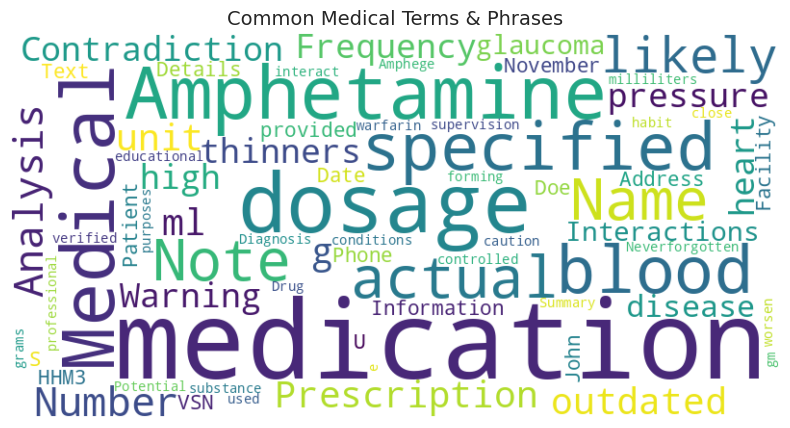

''
                 ###Summary:
                 - Entities recognized: Medicines,Dosages,Diseases and Names.
                 - Visuals Created: NER Chart and Word Cloud for quick inspection.
                 - Goal---> Help non-medical users vusually understand what the prescription covers.
                 

In [12]:
import wordcloud
from wordcloud import WordCloud

plt.figure(figsize=(10,5))
wc = WordCloud(width=800,height=400,background_color='white',colormap='viridis').generate(text_to_analyze)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title('Common Medical Terms & Phrases',fontsize=14)
plt.show()

display(Markdown('''''
                 ###Summary:
                 - Entities recognized: Medicines,Dosages,Diseases and Names.
                 - Visuals Created: NER Chart and Word Cloud for quick inspection.
                 - Goal---> Help non-medical users vusually understand what the prescription covers.
                 '''))


### Project Outro & Credits

In [13]:
# ==========================================================
# 🩺 CELL 5 — PROJECT OUTRO & CREDITS
# ==========================================================
from IPython.display import Markdown, display

display(Markdown("""
# 🏥 **Medical Prescription & Clinical Notes AI Assistant**

### 💡 Project Summary
This intelligent assistant was designed to **read, understand, and explain medical prescriptions or clinical notes** written by doctors.  
It helps patients, students, or researchers easily interpret complex medical terms, spot potential medication interactions, and get simplified explanations — all in a responsible, educational manner.

---

### ⚙️ **Technical Overview**
- **Frameworks Used:** LangChain, FAISS, Groq API, spaCy, Plotly, WordCloud, pdfplumber, and pytesseract  
- **RAG-based Pipeline:** Enables question-answering and context retrieval from medical documents  
- **Multimodal Input:** Supports **PDF, image, and text-based prescriptions**
- **LLM Analysis:** Provides natural language summaries and safe interpretations of the data  
- **Interactive Visualization:** Charts, word clouds, and entity recognition enhance readability

---

### 🎨 **Highlights**
- 💬 Explains **medical jargon** in plain language  
- ⚠️ Detects **warnings and potential interactions**  
- 🔍 Extracts **medications, dosages, and key findings**  
- 📊 Includes **interactive dashboards and visual insights**  
- 🌐 Runs on **Kaggle + Groq API** with modern, conflict-free libraries  

---

### 🙌 **Created by: Muaz**
> “An AI innovator passionate about building real-world, intelligent systems that bridge human understanding and machine intelligence.”  

Muaz has previously built advanced AI tools like:
- 🧠 *Multi-Lingual Legal Document Analyzer*  
- 📚 *Multi-Genre Story Creator with Image Generation*  

This project marks another milestone in his journey toward **AI-powered healthcare solutions**.  

---

### 🧭 **Future Enhancements**
- Integrate **drug-interaction databases** for more accurate health education  
- Support **multilingual prescriptions**  
- Add **speech output** for accessibility  

---

### ⚖️ **Disclaimer**
This project is for **educational and research purposes only.**  
It is **not a substitute** for professional medical advice, diagnosis, or treatment.  
Always consult qualified healthcare professionals for any medical concerns.

---

### 🌟 **Final Words**
> “Where medicine meets machine learning — empowering understanding, not replacing expertise.”

🚀 **End of Project**
"""))



# 🏥 **Medical Prescription & Clinical Notes AI Assistant**

### 💡 Project Summary
This intelligent assistant was designed to **read, understand, and explain medical prescriptions or clinical notes** written by doctors.  
It helps patients, students, or researchers easily interpret complex medical terms, spot potential medication interactions, and get simplified explanations — all in a responsible, educational manner.

---

### ⚙️ **Technical Overview**
- **Frameworks Used:** LangChain, FAISS, Groq API, spaCy, Plotly, WordCloud, pdfplumber, and pytesseract  
- **RAG-based Pipeline:** Enables question-answering and context retrieval from medical documents  
- **Multimodal Input:** Supports **PDF, image, and text-based prescriptions**
- **LLM Analysis:** Provides natural language summaries and safe interpretations of the data  
- **Interactive Visualization:** Charts, word clouds, and entity recognition enhance readability

---

### 🎨 **Highlights**
- 💬 Explains **medical jargon** in plain language  
- ⚠️ Detects **warnings and potential interactions**  
- 🔍 Extracts **medications, dosages, and key findings**  
- 📊 Includes **interactive dashboards and visual insights**  
- 🌐 Runs on **Kaggle + Groq API** with modern, conflict-free libraries  

---

### 🙌 **Created by: Muaz**
> “An AI innovator passionate about building real-world, intelligent systems that bridge human understanding and machine intelligence.”  

Muaz has previously built advanced AI tools like:
- 🧠 *Multi-Lingual Legal Document Analyzer*  
- 📚 *Multi-Genre Story Creator with Image Generation*  

This project marks another milestone in his journey toward **AI-powered healthcare solutions**.  

---

### 🧭 **Future Enhancements**
- Integrate **drug-interaction databases** for more accurate health education  
- Support **multilingual prescriptions**  
- Add **speech output** for accessibility  

---

### ⚖️ **Disclaimer**
This project is for **educational and research purposes only.**  
It is **not a substitute** for professional medical advice, diagnosis, or treatment.  
Always consult qualified healthcare professionals for any medical concerns.

---

### 🌟 **Final Words**
> “Where medicine meets machine learning — empowering understanding, not replacing expertise.”

🚀 **End of Project**
